In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import random

In [2]:
image_path = r"C:\Users\Student\Desktop\OIP (3).jpg"

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def plotimage(img, title=None, figsize=None, invert=False):
    if invert:
        img = np.max(img) - img.copy()

    h = img.shape[0]
    w = img.shape[1]
    dpi = 80
    if figsize is None:
        figsize = w / float(dpi), h / float(dpi)
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])
    ax.axis('off')
    ax.imshow(img, cmap='gray')
    if title:
        plt.title(title)
    plt.show()


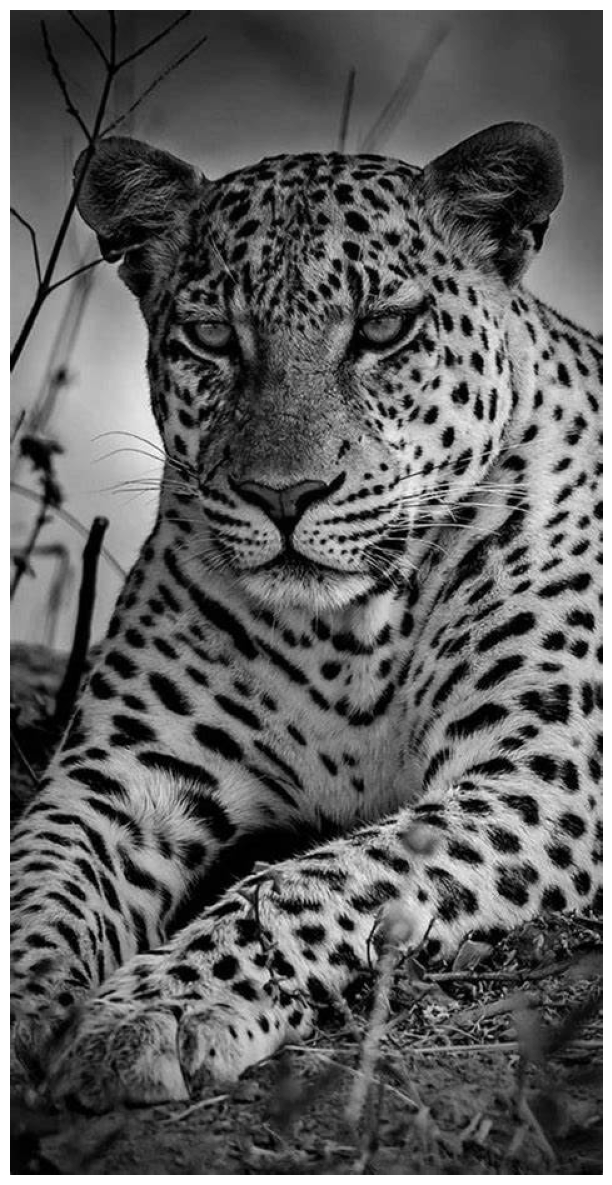

In [6]:
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# img = np.zeros((500,500), dtype='uint8')
# r,c = img.shape[0]//2,img.shape[1]//2
# n=20
# cv2.circle(img, (c,r), n, 1, -1)
plotimage(img)

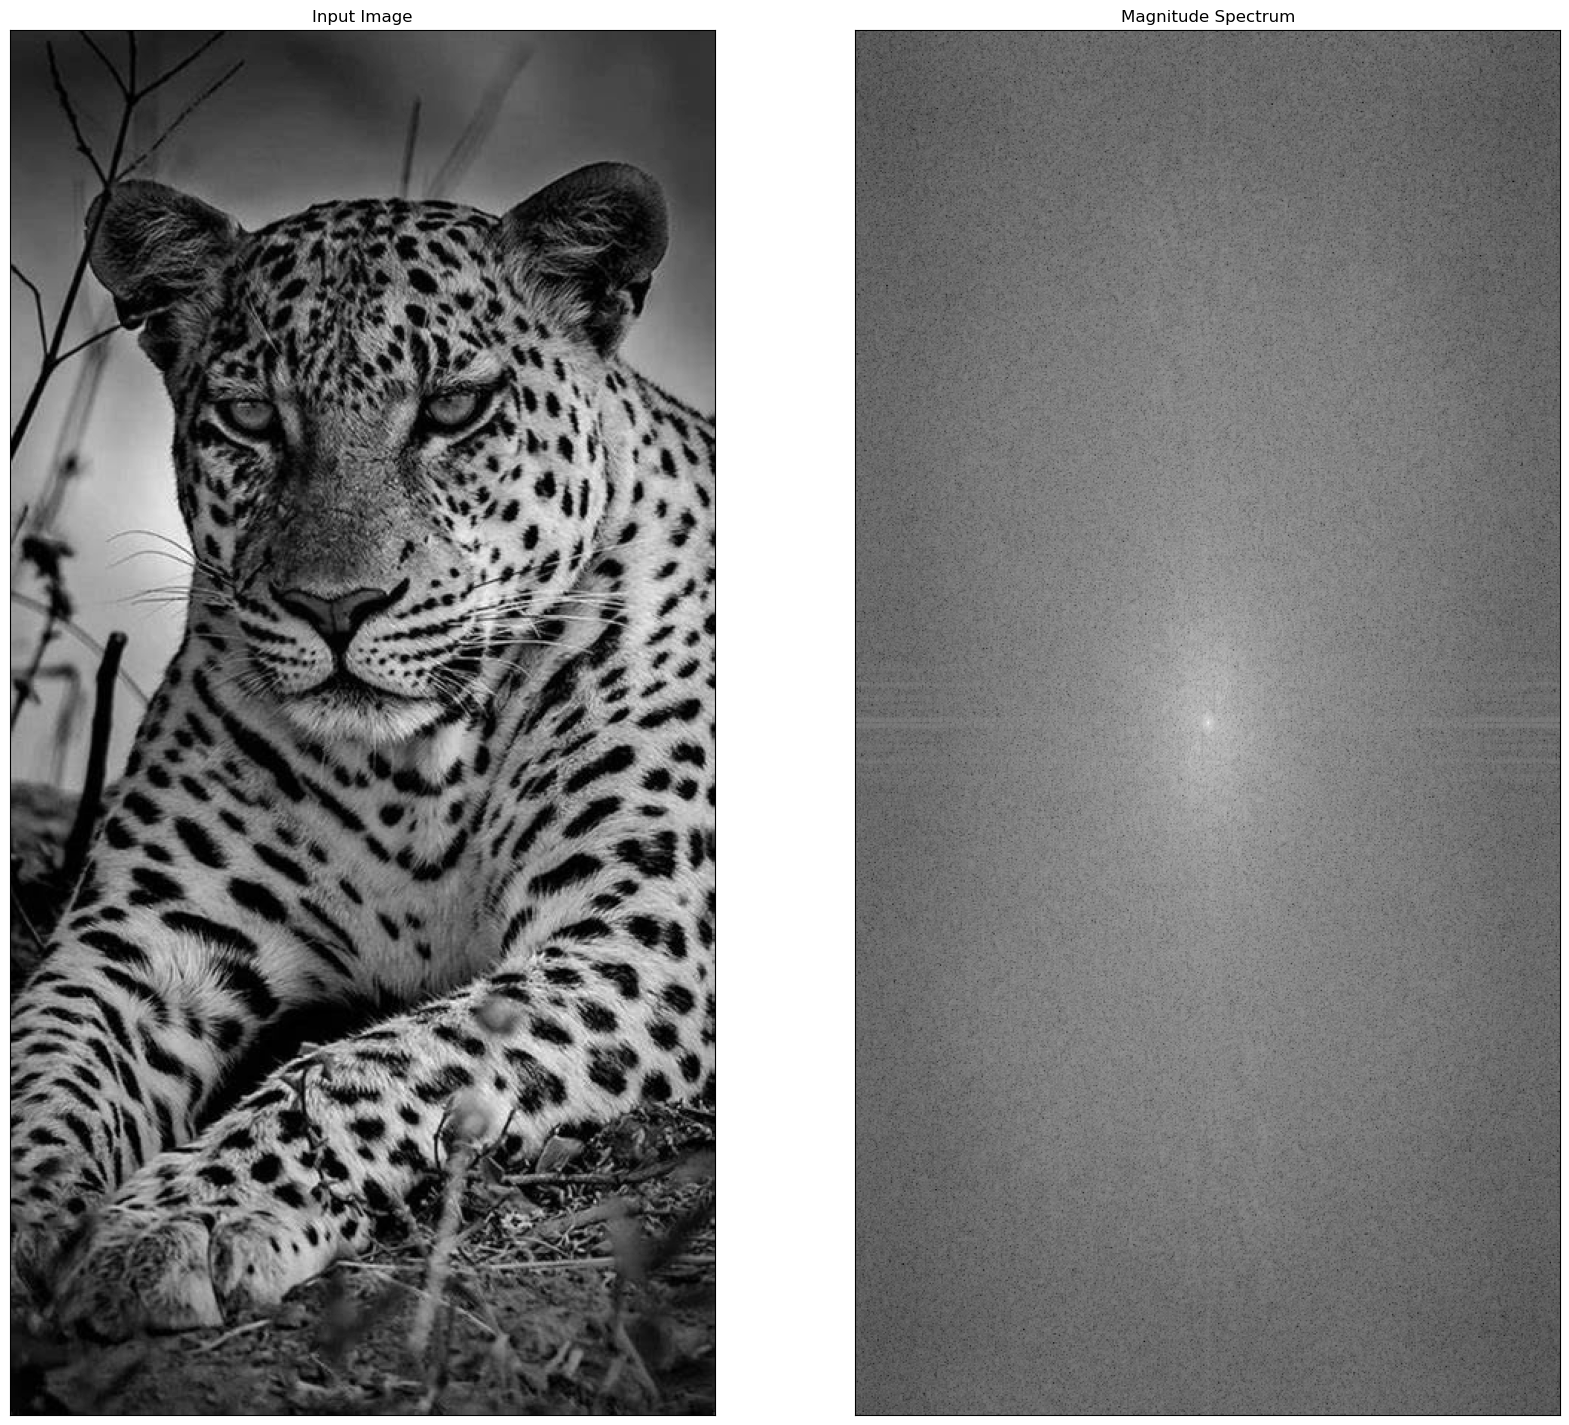

In [9]:
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
#for plotting
magnitude_spectrum = 20*np.log(np.abs(fshift))
plt.figure(figsize=(20,20))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

In [15]:
def get_filter(r,c, w1,w2=None, mode='lpf'):
 if mode=='lpf' or mode == 'hpf':
  pf = np.zeros((r,c), dtype='uint8')
 crow,ccol = r//2 , c//2 
 cv2.circle(pf,(ccol,crow),w1,1, -1)
 if mode == 'lpf':
 return pf
    if mode == 'hpf':
 return 1-pf
 return None
 
 if mode == 'bpf' or mode == 'bsf':
 hpf = get_filter(r=r,c=c,w1=w1, mode='hpf')
 lpf = get_filter(r=r,c=c,w1=w2, mode='lpf')
 bpf = hpf * lpf
 if mode == 'bpf':
 return bpf
 if mode == 'bsf':
 return 1-bpf
 return None
 
 if mode in ('blpf','bhpf','glpf','ghpf'):
 w,h=c,r 
 x,y = np.meshgrid(list(range(w)),list(range(h)))
 center = (w//2,h//2)
 z = np.sqrt(np.square(x-center[0]) + np.square(y-center[1]))
 if mode in ('blpf','bhpf'):
 b = 1/(1+np.square(z/w1))
 if mode == 'blpf': 
 return b
 if mode == 'bhpf':
 return 1-b
 
 if mode in ('glpf','ghpf'):
 b = np.exp(-np.square(z)/(2*np.square(w1)))
 if mode == 'glpf': 
 return b
 if mode == 'ghpf':
 return 1-b


SyntaxError: incomplete input (2660598528.py, line 8)